In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [16]:
# Feature Selection (With binary data)
from sklearn.feature_selection import mutual_info_classif

def feature_selection(inputfile, compared_with, compared_for, threshold):
    data = pd.read_CSV(inputfile)
    filtered_features = []
    features = data[compared_with]
    class_label = data[compared_for]
    mi_arr = mutual_info_classif(X=features, y=class_label, discrete_features=True)

    for feature, mi in zip(features.columns, mi_arr):
        print(f'MI value for feature "{feature}": {mi:.4f}')
        
        if(mi >= threshold): 
            filtered_features.append(feature)
            
    return ('\nFeature set after filtering with MI:', filtered_features)

In [33]:
# Total data missing function

def null_NaN_total(input_file, feature):
    data = pd.read_csv(input_file)
    nan_count = data[feature].isna().sum().sum()
    null_count = data[feature].isnull().sum().sum()
    total_missing = nan_count + null_count
    df = pd.DataFrame(data)
    shape = df.shape
    num_rows = shape[0]
    num_columns = shape[1]
    
    return 'Number of missing values:', total_missing, num_rows

null_NaN_total('standardized.csv', 'runtime')

#null_NaN_total('standardized.csv', 'genres')



('Number of missing values:', 0, 3744)

There is no missing data for runtime nor genres

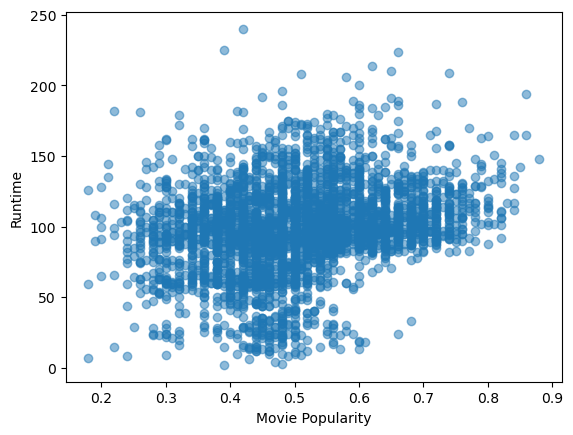

,weighted_average_popularity,runtime
weighted_average_popularity,1.000000,0.255711
runtime,0.255711,1.000000


In [10]:
# Calculate the Pearson-R between movie polularity and Runtime

data = pd.read_csv('standardized.csv')

plt.scatter(x=data['weighted_average_popularity'], y=data['runtime'], alpha=0.5)
plt.xlabel('Movie Popularity')
plt.ylabel('Runtime')

plt.show()

FEATURES = ['weighted_average_popularity', 'runtime']

data[FEATURES].corr(method='pearson')


Pearson R correlation is 0.255711 between runtime, since it is below 0.29, it's determined that there is weak positive correlation between runtime and weighted_average_popularity

In [53]:
#Discretalize using binning then Mutual Information

data = pd.read_csv('standardized.csv')

binned10 = KBinsDiscretizer(n_bins=3,
                               encode='ordinal', 
                               strategy='uniform')


data['binned_popularity'] = binned10.fit_transform(data[['weighted_average_popularity']]).astype(int)

data['binned_runtime'] = binned10.fit_transform(data[['runtime']]).astype(int)

# data['binned_runtime'].hist(bins=5)

# plt.title('Distribution of run afer binning (bins=5)')

# plt.show()

nmi = normalized_mutual_info_score(data['binned_runtime'], data['binned_popularity'], 
                                   average_method='min')
print(nmi)




0.05369686041106029


/Users/Tianyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/Tianyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Weak to no relationship between runtime and popularity based on normalized mutual information


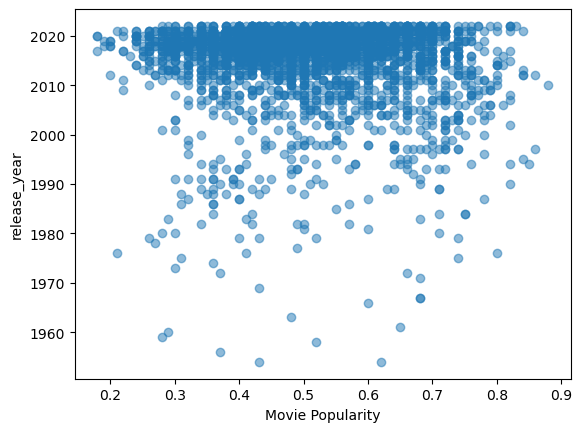

,weighted_average_popularity,release_year
weighted_average_popularity,1.000000,-0.074709
release_year,-0.074709,1.000000


In [19]:
# calculate the Pearson-R between movie polularity and year released

data = pd.read_csv('standardized.csv')

plt.scatter(x=data['weighted_average_popularity'], y=data['release_year'], alpha=0.5)
plt.xlabel('Movie Popularity')
plt.ylabel('release_year')

plt.show()

FEATURES = ['weighted_average_popularity', 'release_year']

data[FEATURES].corr(method='pearson')


There is very little negative linear correlation between weighted average popularity and release year based on Pearson R correlation.

In [64]:
#Discretalize using binning then Mutual Information

data = pd.read_csv('standardized.csv')

binned = KBinsDiscretizer(n_bins=3,
                               encode='ordinal', 
                               strategy='uniform')


data['binned_popularity'] = binned.fit_transform(data[['weighted_average_popularity']]).astype(int)

data['binned_release_year'] = binned.fit_transform(data[['release_year']]).astype(int)

# data['binned_runtime'].hist(bins=5)

# plt.title('Distribution of run afer binning (bins=5)')

# plt.show()

normalized_mutual_info_score(data['binned_release_year'], 
                             data['binned_popularity'], 
                             
                             # we use min here because in NMI, we want to have our demoninator
                             # to be min(H(X), H(Y))
                             average_method='min')

/Users/Tianyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/Tianyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.034711302189134034

Weak to no relationship between runtime and popularity based on normalized mutual information

In [37]:
# One hot encoding for movie genre

data = pd.read_csv('/Users/Tianyi/Documents/GitHub/Movie_Popularity_Analysis/standardized.csv')

for i in range(0, data.shape[0]):

        current_genre = data.loc[i, 'genres']
        current_genre = eval(current_genre)
        data.at[i, 'genres'] = current_genre
        
data.to_csv('updated_genres.csv', index=False)

df = pd.read_csv('/Users/Tianyi/Documents/GitHub/Movie_Popularity_Analysis/updated_genres.csv')

mlb = MultiLabelBinarizer()
encoder = OneHotEncoder(sparse=False)
multi_hot_encoded = pd.DataFrame(mlb.fit_transform(data['genres']), columns=mlb.classes_)
multi_hot_encoded['popularity'] = data['weighted_average_popularity']
multi_hot_encoded.to_csv('multi_hot_encoded_genres.csv', index=False)

print(multi_hot_encoded)


      action  animation  comedy  crime  documentation  drama  european  \
0          0          0       0      1              0      1         0   
1          1          0       0      0              0      1         1   
2          1          0       1      0              0      0         0   
3          1          0       0      0              0      0         0   
4          0          0       1      0              0      0         0   
...      ...        ...     ...    ...            ...    ...       ...   
3739       0          0       0      0              0      0         0   
3740       0          0       0      0              0      1         0   
3741       0          0       0      0              0      1         0   
3742       0          0       1      0              0      0         0   
3743       0          0       0      0              0      0         0   

      family  fantasy  history  horror  music  reality  romance  scifi  sport  \
0          0        0        0

In [65]:
# Genre feature selection and MI

data = pd.read_csv('multi_hot_encoded_genres.csv')

X = data.drop('popularity', axis=1)
y = data['popularity']

k = 19  # Choose the number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=20008)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r_squared = model.score(X_test, y_test)



print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

#print(model.coef_)


feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importances)


MSE: 0.011354475045306794
RMSE: 0.10655737912179895
R-squared: 0.17745200873202527
          Feature  Coefficient
10         horror     0.065109
14          scifi     0.057754
8         fantasy     0.055419
18        western     0.050873
9         history     0.048843
3           crime     0.046732
17            war     0.044180
15          sport     0.041159
0          action     0.038669
16       thriller     0.037992
6        european     0.028393
13        romance     0.023308
5           drama     0.016173
11          music     0.014750
2          comedy     0.012234
7          family     0.009452
12        reality    -0.004040
4   documentation    -0.006238
1       animation    -0.010492
